In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Markdown as md

In [9]:
sandp = pd.read_csv("constituents-financials_csv.csv")
sandp = sandp.fillna(0.0)
sandp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
Symbol            505 non-null object
Name              505 non-null object
Sector            505 non-null object
Price             505 non-null float64
Price/Earnings    505 non-null float64
Dividend Yield    505 non-null float64
Earnings/Share    505 non-null float64
52 Week Low       505 non-null float64
52 Week High      505 non-null float64
Market Cap        505 non-null int64
EBITDA            505 non-null float64
Price/Sales       505 non-null float64
Price/Book        505 non-null float64
SEC Filings       505 non-null object
dtypes: float64(9), int64(1), object(4)
memory usage: 55.4+ KB


In [10]:
sandp.sample(n=10)

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
495,WYNN,Wynn Resorts Ltd,Consumer Discretionary,169.28,31.70,1.127904,7.27,203.630,92.670,18225400525,1.501301e+09,2.478658,51.69,http://www.sec.gov/cgi-bin/browse-edgar?action...
86,CDNS,Cadence Design Systems,Information Technology,36.82,34.09,0.000000,0.74,46.000,29.010,10890625200,4.556070e+08,5.751737,10.98,http://www.sec.gov/cgi-bin/browse-edgar?action...
475,VRTX,Vertex Pharmaceuticals Inc,Health Care,151.60,252.67,0.000000,1.04,174.955,84.390,39369386348,9.756200e+07,16.185404,21.91,http://www.sec.gov/cgi-bin/browse-edgar?action...
327,NWL,Newell Brands,Consumer Discretionary,27.91,9.72,3.122879,1.17,55.080,23.850,14438346000,2.021400e+09,1.281048,1.01,http://www.sec.gov/cgi-bin/browse-edgar?action...
176,ESS,"Essex Property Trust, Inc.",Real Estate,218.28,18.66,3.213810,6.27,270.040,214.030,14383525286,1.237886e+09,14.183084,2.30,http://www.sec.gov/cgi-bin/browse-edgar?action...
346,OXY,Occidental Petroleum,Energy,68.47,195.63,4.408186,-0.75,78.090,57.200,53467692395,5.205000e+09,6.044895,0.00,http://www.sec.gov/cgi-bin/browse-edgar?action...
85,COG,Cabot Oil & Gas,Energy,23.01,60.55,1.026958,-0.92,29.570,21.400,10808821635,4.049510e+08,8.636729,4.21,http://www.sec.gov/cgi-bin/browse-edgar?action...
295,MMC,Marsh & McLennan,Financials,79.31,20.23,1.825706,2.87,86.540,69.330,41819440000,3.236000e+09,2.984894,5.85,http://www.sec.gov/cgi-bin/browse-edgar?action...
55,ARNC,Arconic Inc,Industrials,24.45,20.21,0.956175,-0.21,31.170,21.755,12123300000,1.517000e+09,0.942148,0.00,http://www.sec.gov/cgi-bin/browse-edgar?action...
501,YUM,Yum! Brands Inc,Consumer Discretionary,76.30,27.25,1.797080,4.07,86.930,62.850,27003303098,2.289000e+09,6.313636,212.08,http://www.sec.gov/cgi-bin/browse-edgar?action...


### Choose one variable and plot that variable four different ways

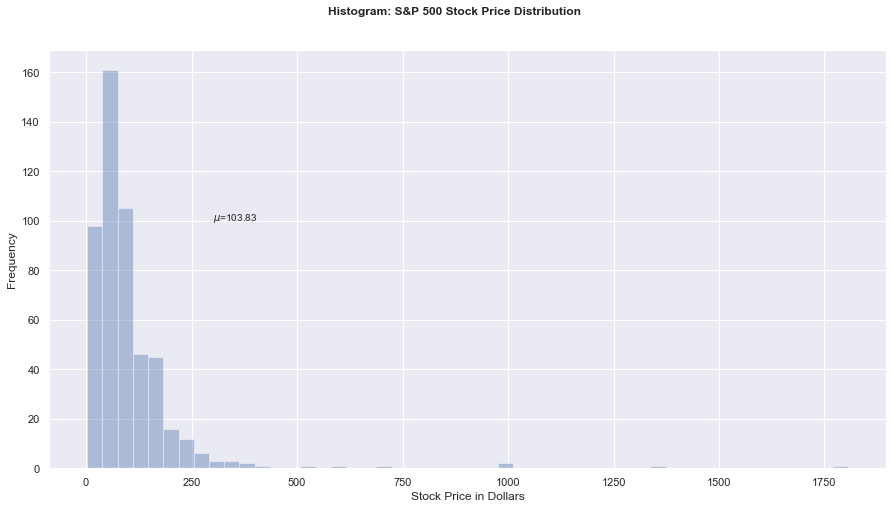

In [76]:
# Initialize the figure and axes
fig, ax = plt.subplots(figsize=(15,7.5))

# Plot the Histogram
sns.distplot(sandp["Price"], kde=False)

# Tweak the presentation
fig.suptitle("Histogram: S&P 500 Stock Price Distribution", fontsize=12, fontweight='bold')
fig.subplots_adjust(top=0.9, wspace=0.3)
ax.set(xlabel="Stock Price in Dollars")
ax.set(ylabel="Frequency")

# Add text into the subplot
ax.text(x=300, y=100, s=r'$ \mu $='+str(round(sandp['Price'].mean(), 2)), fontsize=10)
sns.set();

<h3>Histogram Pros and Cons</h3>
<p>Pros</p>
<ul>
    <li>Easy to compare data</li>
    <li>Works well with data ranges</li>
    <li>Easy to compare data</li>
</ul>
<p>Cons</p>
<ul>
    <li>Difficult to determine exact amounts for variable values</li>
    <li>Inconvenient for comparing multiple variables</li>
</ul>

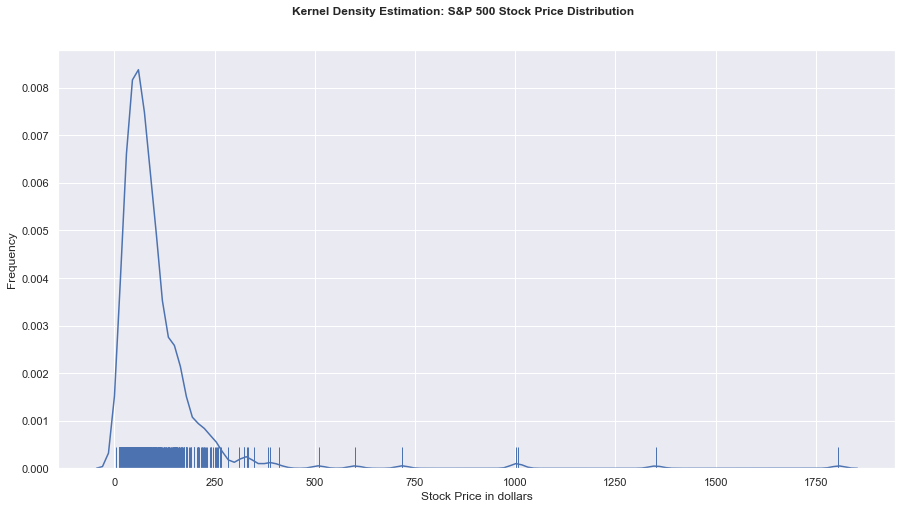

In [77]:
# Initialize the the figure and axes
fig, ax = plt.subplots(figsize=(15,7.5))

# Plot the KDE
sns.distplot(sandp["Price"], hist=False, rug=True)

# Tweak the presentation
fig.suptitle("Kernel Density Estimation: S&P 500 Stock Price Distribution", fontsize=12, fontweight='bold')
fig.subplots_adjust(top=0.9, wspace=0.3)
ax.set_xlabel("Stock Price in dollars")
ax.set_ylabel("Frequency")
sns.set();

<h3>Kernel Density Estimation</h3>
<p>Pros</p>
<ul>
    <li>Useful in visulaizing the shape of the data</li>
    <li>Presents a smooth line</li>
</ul>
<p>Cons</p>
<ul>
    <li>Line smoothness, bandwith, is important</li>
    <li>Like the histogram, it is hard to identify individual values.</li>
</ul>

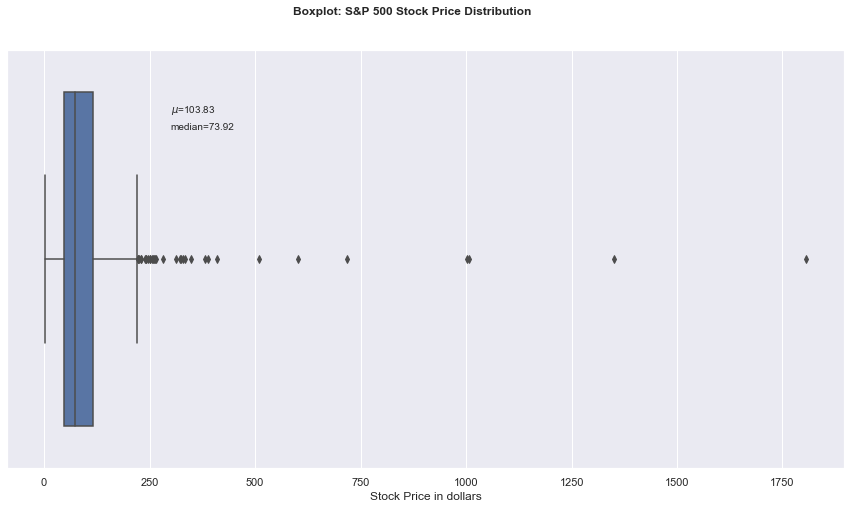

In [82]:
# Initialize the figure and axes
fig, ax = plt.subplots(figsize=(15,7.5))

# Draw the boxplot
sns.boxplot(sandp["Price"])

# Tweak the presentation
fig.suptitle("Boxplot: S&P 500 Stock Price Distribution", fontsize=12, fontweight='bold')
fig.subplots_adjust(top=0.9, wspace=0.3)
ax.set(xlabel="Stock Price in dollars")

# Add text into the subplot
ax.text(x=300, y=-0.35, s=r'$ \mu $='+str(round(sandp['Price'].mean(), 2)), fontsize=10)
ax.text(x=300, y=-0.31, s=r'median='+str(round(sandp['Price'].median(), 2)), fontsize=10)
sns.set();

<h3>Box Plot</h3>
<p>Pros</p>
<ul>
    <li>Useful in visualizing data outliers</li>
    <li>Shows Min, Max, and Quartile values</li>
</ul>
<p>Cons</p>
<ul>
    <li>Not good for identifying individual values</li>
    <li>Can be skewed</li>
</ul>

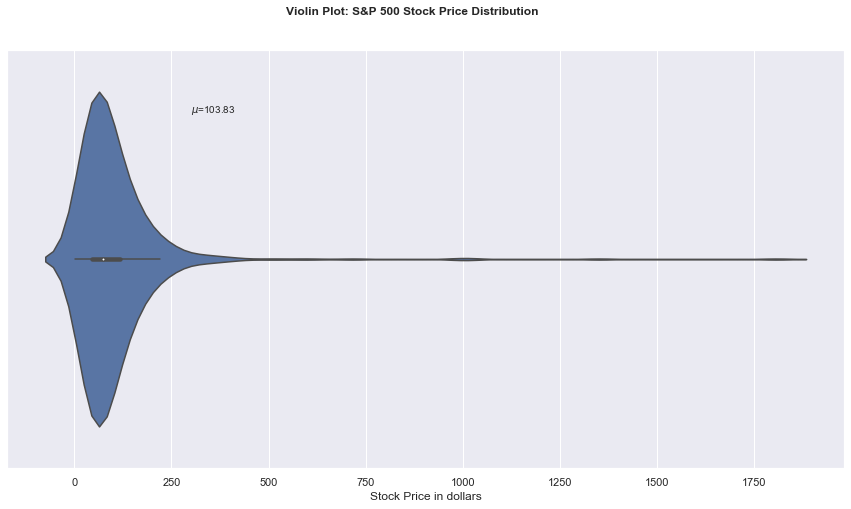

In [130]:
# Initialize the figure and axes
fig, ax = plt.subplots(figsize=(15,7.5))

# Draw the boxplot
sns.violinplot(sandp["Price"])

# Tweak the presentation
fig.suptitle("Violin Plot: S&P 500 Stock Price Distribution", fontsize=12, fontweight='bold')
fig.subplots_adjust(top=0.9, wspace=0.3)
ax.set(xlabel="Stock Price in dollars")

# Add text into the subplot
ax.text(x=300, y=-0.35, s=r'$ \mu $='+str(round(sandp['Price'].mean(), 2)), fontsize=10)
sns.set();

<h3>Violin Plot</h3>
<p>Pros</p>
<ul>
    <li>Combines box plot with kernel density estimate</li>
    <li>Usefult in visualizing skewness</li>
</ul>
<p>Cons</p>
<ul>
    <li>Not all data is seen</li>
    <li>Must be careful with Kernel choice</li>
</ul>

### Choose two continuous variables and plot them three different ways

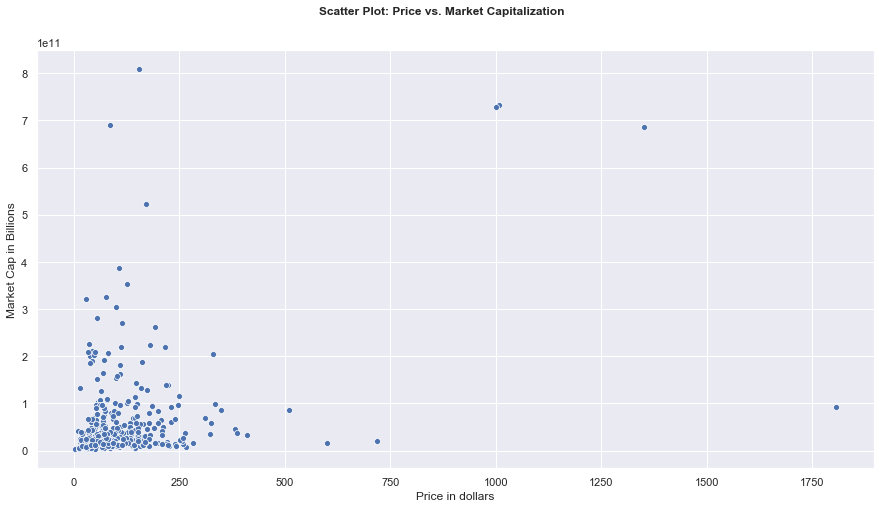

In [88]:
# Initialize the figure and axes
fig, ax = plt.subplots(figsize=(15,7.5))

# Draw the scatter plot
sns.scatterplot(x=sandp["Price"], y=sandp["Market Cap"])

# Tweak the presentation
fig.suptitle("Scatter Plot: Price vs. Market Capitalization", fontsize=12, fontweight="bold")
fig.subplots_adjust(top=0.9, wspace=0.3)
ax.set(xlabel="Price in dollars")
ax.set(ylabel="Market Cap in Billions")

sns.set()

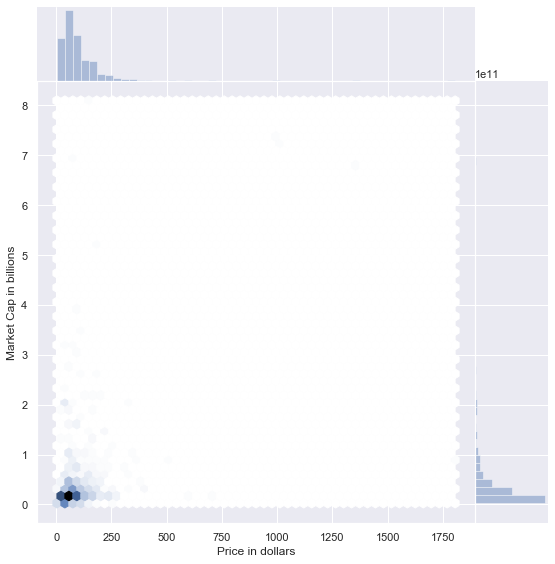

In [120]:
# Draw the Hexbin plot
jp = sns.jointplot(x=sandp["Price"], y=sandp["Market Cap"], kind="hex", space=0, height=8, ratio=6)
jp.set_axis_labels("Price in dollars", "Market Cap in billions", fontsize=12);

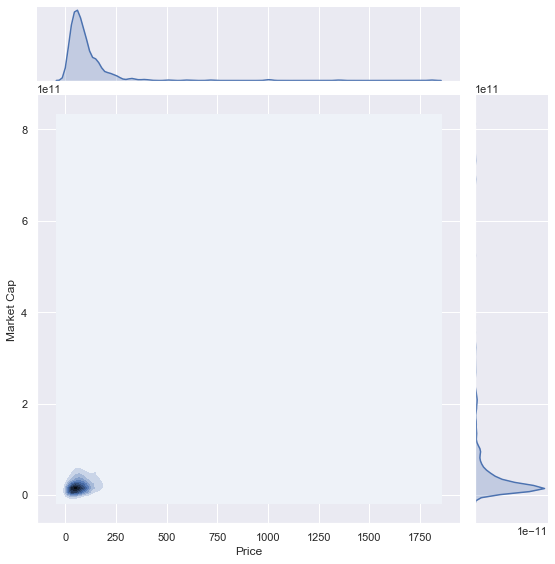

In [123]:
jkde = sns.jointplot(x=sandp["Price"], y=sandp["Market Cap"], kind="kde", height=8)

### Choose one continuous variable and one categorical variable and plot them six different ways.

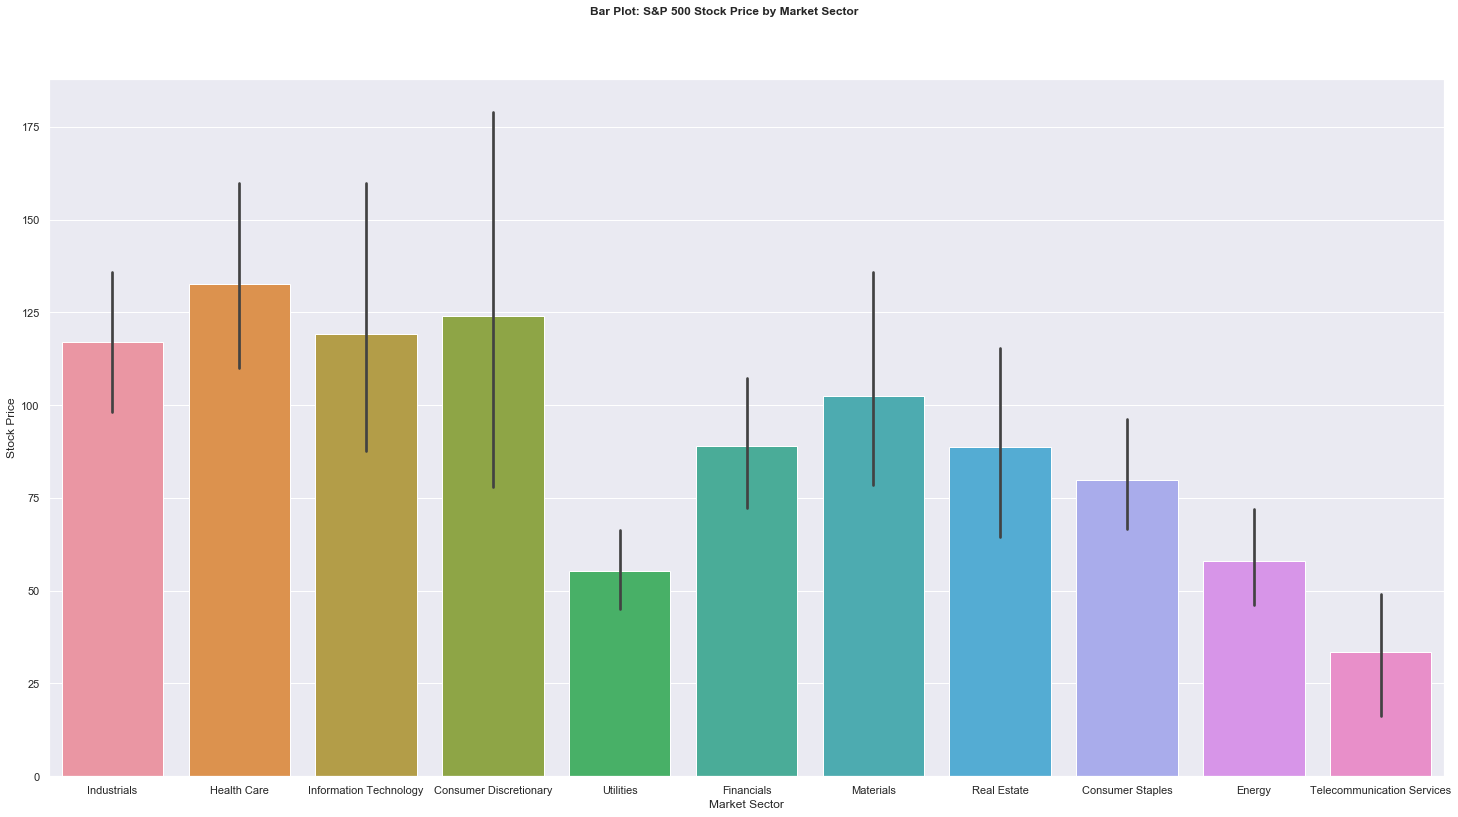

In [134]:
 # Initialize the figure and axes
fig, ax = plt.subplots(figsize=(25,12.5))

# Plot the Histogram
sns.barplot(x=sandp["Sector"],y=sandp["Price"])

# Tweak the presentation
fig.suptitle("Bar Plot: S&P 500 Stock Price by Market Sector", fontsize=12, fontweight='bold')
fig.subplots_adjust(top=0.9, wspace=0.3)
ax.set(xlabel="Market Sector")
ax.set(ylabel="Stock Price")

sns.set();

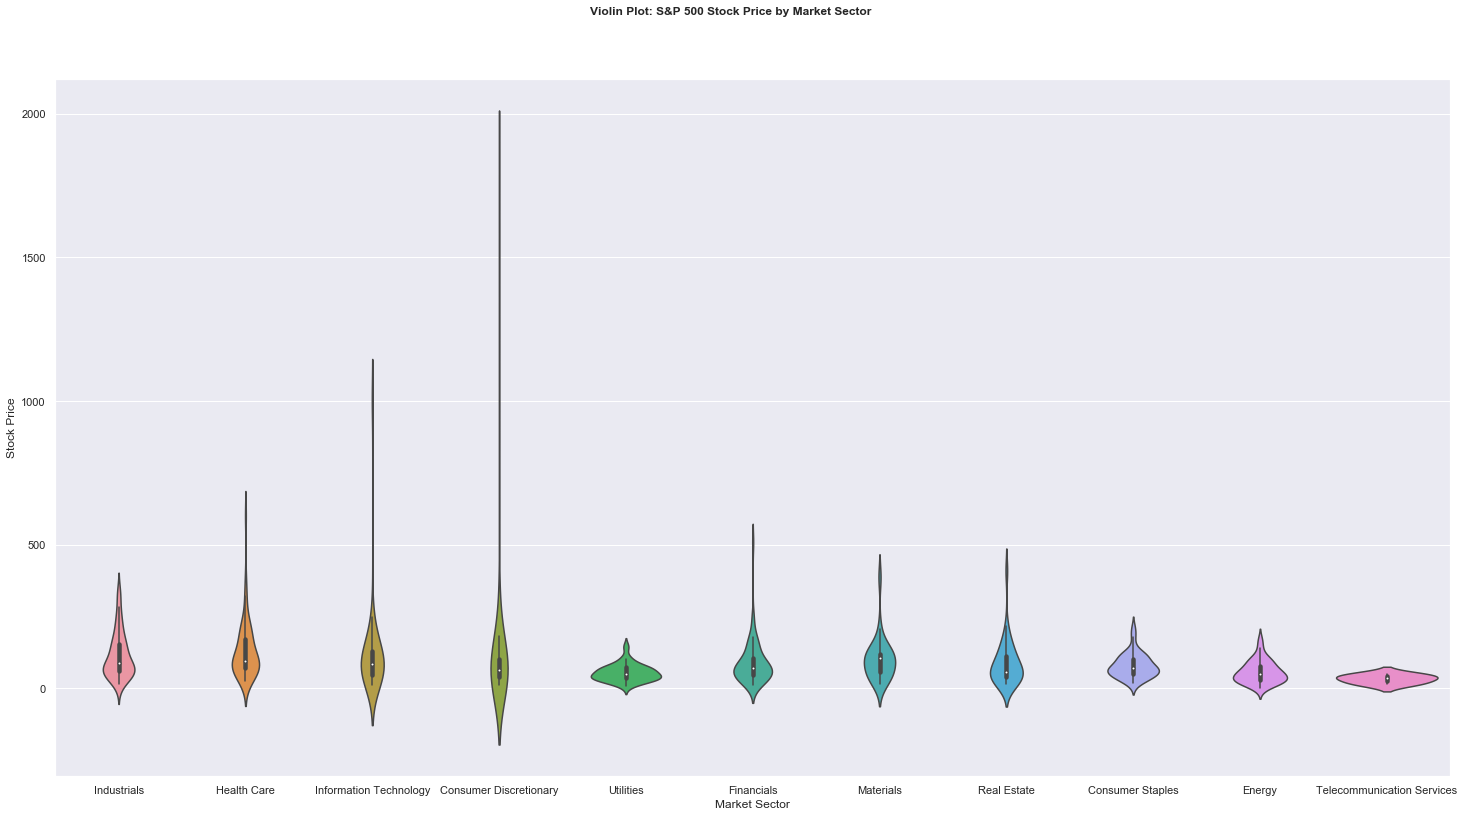

In [149]:
# Initialize the figure and axes
fig, ax = plt.subplots(figsize=(25,12.5))

# Draw the boxplot
sns.violinplot(x=sandp["Sector"],y=sandp["Price"])

# Tweak the presentation
fig.suptitle("Violin Plot: S&P 500 Stock Price by Market Sector", fontsize=12, fontweight='bold')
fig.subplots_adjust(top=0.9, wspace=0.3)
ax.set(xlabel="Market Sector")
ax.set(ylabel="Stock Price")

sns.set();

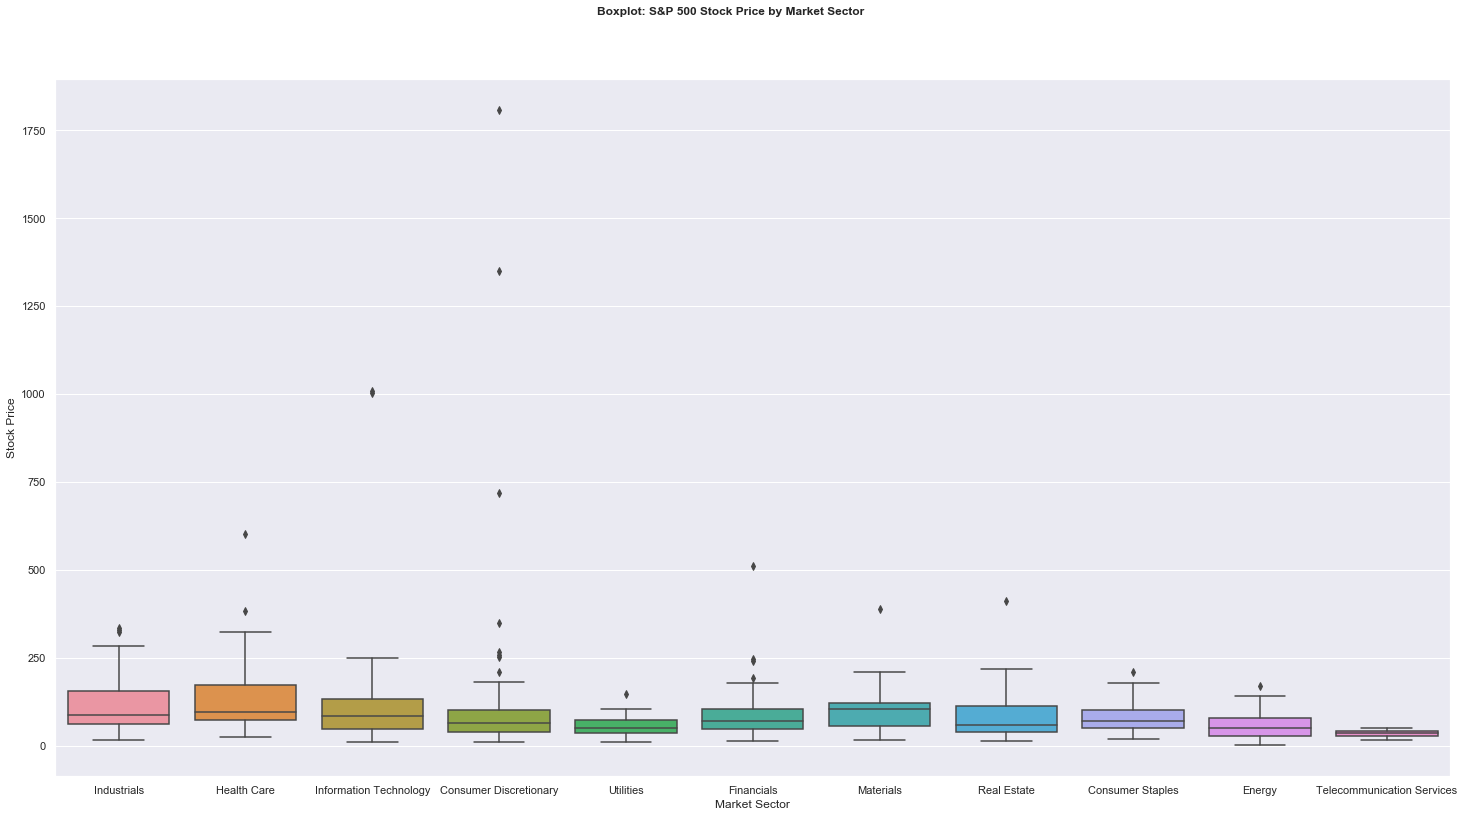

In [136]:
# Initialize the figure and axes
fig, ax = plt.subplots(figsize=(25,12.5))

# Draw the boxplot
sns.boxplot(x=sandp["Sector"],y=sandp["Price"])

# Tweak the presentation
fig.suptitle("Boxplot: S&P 500 Stock Price by Market Sector", fontsize=12, fontweight='bold')
fig.subplots_adjust(top=0.9, wspace=0.3)
ax.set(xlabel="Market Sector")
ax.set(ylabel="Stock Price")

sns.set();

### Find a dataset with at least four continuous variables and one categorical variable.  Create one master plot that gives insight into the variables and their interrelationships

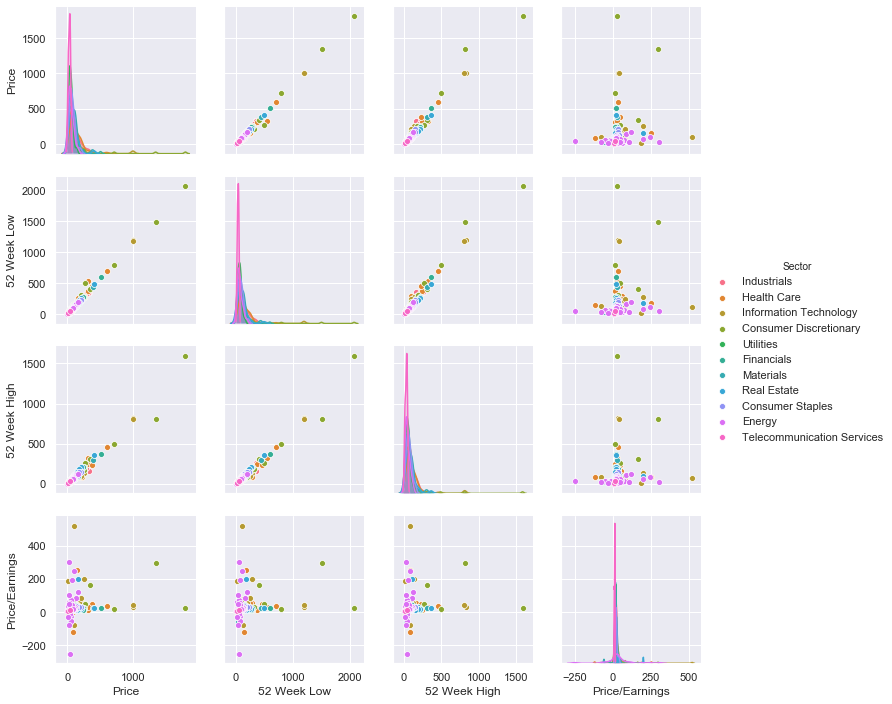

In [151]:
master = sandp[["Sector","Price","52 Week Low","52 Week High","Price/Earnings"]]

sns.pairplot(master, hue="Sector")